In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline


import lightgbm as lgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split


import warnings
from six.moves import urllib
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

import scipy
from scipy.stats import norm, skew

#Import the required libraries
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
#LABELS = ["Normal", "Fraud"]
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

from sklearn.manifold import TSNE

In [2]:
#data = pd.read_csv('D:/FV_raw/S01_total_rev.csv')
data = pd.read_csv('C:\\Users\\\koreaw\\비즈니스어낼리틱스\\BA_data\\S01_data_rev_1.csv')
print(data.shape)

(53692, 94)


# EDA

In [3]:
var = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
target = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(var)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.085121,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.099081,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.115764,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.090398,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.009193,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9


In [4]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)
data2_norm2 = pd.DataFrame(new_data2)
data_norm = data2_norm2.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9


## Class 7개, 최종 데이터 셋 

In [5]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,17.0
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,21.0
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,9.0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,21.0
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,9.0


## Class 9 vs all 

In [6]:
def func2(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func2, axis = 1)

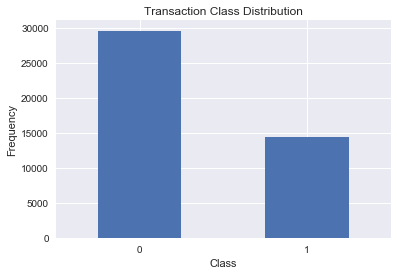

In [7]:
count_classes = pd.value_counts(data_norm1['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
columns = data_norm1.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm1[columns]
X=X.drop('Class', axis=1)
Y=data_norm1['ClassA']
data_norm11 = X.merge(Y.to_frame(),left_index=True, right_index = True)

In [9]:
state = np.random.RandomState(42)
Fraud = data_norm11[data_norm11['ClassA']==1]
Valid = data_norm11[data_norm11['ClassA']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262


In [15]:
clf =IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)

In [16]:
y_pred = clf.fit_predict(X)

In [17]:
y_pred

array([-1,  1, -1, ..., -1, -1, -1])

In [19]:
y_pred[y_pred == 1] = 0

In [20]:
y_pred

array([-1,  0, -1, ..., -1, -1, -1])

In [24]:
Y

0        1
1        1
2        0
3        1
4        0
        ..
53687    0
53688    0
53689    0
53690    0
53691    0
Name: ClassA, Length: 43988, dtype: int64

In [12]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 20581
Accuracy Score :
0.5321223970173684
Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.51      0.60     29571
           1       0.36      0.57      0.44     14417

    accuracy                           0.53     43988
   macro avg       0.54      0.54      0.52     43988
weighted avg       0.60      0.53      0.55     43988

Local Outlier Factor: 21793
Accuracy Score :
0.5045694280258253
Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.49      0.57     29571
           1       0.34      0.53      0.41     14417

    accuracy                           0.50     43988
   macro avg       0.51      0.51      0.49     43988
weighted avg       0.57      0.50      0.52     43988

Support Vector Machine: 28773
Accuracy Score :
0.3458897881240338
Classification Report :
              precision    recall  f1-score   support

           0       0.68      

## Class 21(0) vs all(1)

In [26]:
data_norm2 = data_norm1[data_norm1['ClassA']==1]

def func3(data_norm2) :
    if data_norm2['Class'] == 21 : return 0
    else : return 1
data_norm2['ClassA'] = data_norm2.apply(func3, axis = 1)

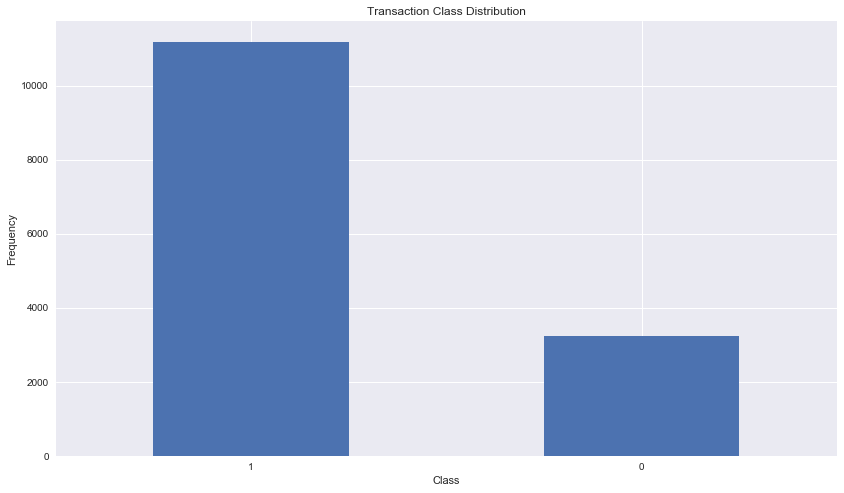

In [27]:
count_classes = pd.value_counts(data_norm2['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [28]:
columns = data_norm2.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm2[columns]
X=X.drop('Class', axis=1)
Y=data_norm2['ClassA']
data_norm22 = X.merge(Y.to_frame(),left_index=True, right_index = True)

In [39]:
state = np.random.RandomState(42)
Fraud = data_norm22[data_norm22['ClassA']==0]
Valid = data_norm22[data_norm22['ClassA']==1]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [40]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 9561
Accuracy Score :
0.3368245820905875
Classification Report :
              precision    recall  f1-score   support

           0       0.19      0.61      0.29      3232
           1       0.69      0.26      0.38     11185

    accuracy                           0.34     14417
   macro avg       0.44      0.43      0.33     14417
weighted avg       0.58      0.34      0.36     14417

Local Outlier Factor: 9347
Accuracy Score :
0.35166816952209196
Classification Report :
              precision    recall  f1-score   support

           0       0.20      0.64      0.31      3232
           1       0.72      0.27      0.39     11185

    accuracy                           0.35     14417
   macro avg       0.46      0.45      0.35     14417
weighted avg       0.60      0.35      0.37     14417

Support Vector Machine: 10709
Accuracy Score :
0.257196365401956
Classification Report :
              precision    recall  f1-score   support

           0       0.23      0.

## Class 17(0) vs all(1)

In [42]:
data_norm3 = data_norm2[data_norm2['ClassA']==1]

def func(data_norm3) :
    if data_norm3['Class'] == 17 : return 0
    else : return 1
data_norm3['ClassA'] = data_norm3.apply(func, axis = 1)

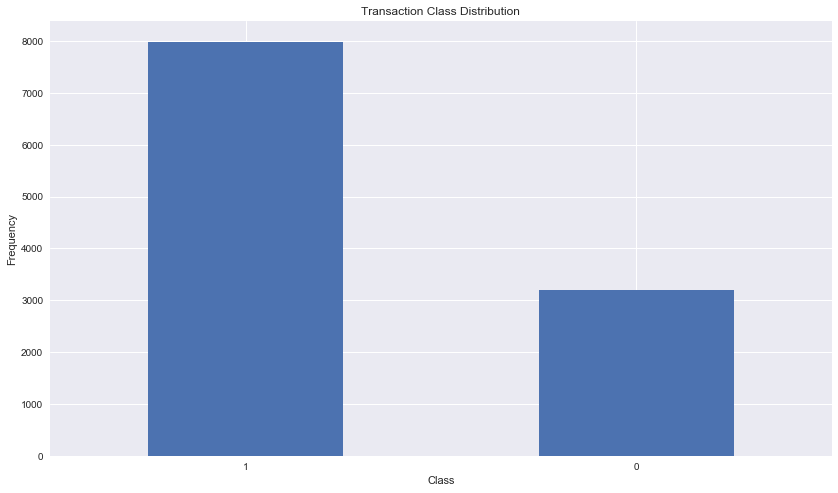

In [43]:
count_classes = pd.value_counts(data_norm3['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [44]:
columns = data_norm3.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm3[columns]
X=X.drop('Class', axis=1)
Y=data_norm3['ClassA']
data_norm33 = X.merge(Y.to_frame(),left_index=True, right_index = True)

In [45]:
state = np.random.RandomState(42)
Fraud = data_norm33[data_norm33['ClassA']==0]
Valid = data_norm33[data_norm33['ClassA']==1]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}


In [46]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


Isolation Forest: 6066
Accuracy Score :
0.4576665176575771
Classification Report :
              precision    recall  f1-score   support

           0       0.29      0.60      0.39      3194
           1       0.72      0.40      0.51      7991

    accuracy                           0.46     11185
   macro avg       0.50      0.50      0.45     11185
weighted avg       0.59      0.46      0.48     11185

Local Outlier Factor: 6300
Accuracy Score :
0.43674564148413053
Classification Report :
              precision    recall  f1-score   support

           0       0.27      0.56      0.36      3194
           1       0.69      0.39      0.49      7991

    accuracy                           0.44     11185
   macro avg       0.48      0.48      0.43     11185
weighted avg       0.57      0.44      0.46     11185

Support Vector Machine: 7596
Accuracy Score :
0.32087617344658026
Classification Report :
              precision    recall  f1-score   support

           0       0.29      0

## Class 16 vs all

In [47]:
data_norm4 = data_norm3[data_norm3['ClassA']==1]

def func(data_norm4) :
    if data_norm4['Class'] == 16 : return 0
    else : return 1
data_norm4['ClassA'] = data_norm4.apply(func, axis = 1)

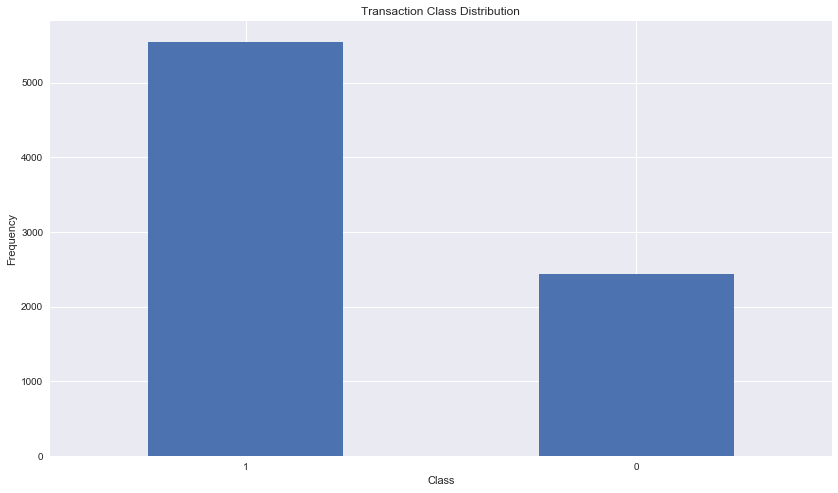

In [48]:
count_classes = pd.value_counts(data_norm4['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");


In [49]:
columns = data_norm4.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm4[columns]
X=X.drop('Class', axis=1)
Y=data_norm4['ClassA']
data_norm44 = X.merge(Y.to_frame(),left_index=True, right_index = True)


In [66]:
state = np.random.RandomState(42)
Fraud = data_norm44[data_norm44['ClassA']==0]
Valid = data_norm44[data_norm44['ClassA']==1]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}


In [51]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


Isolation Forest: 4381
Accuracy Score :
0.45175822800650733
Classification Report :
              precision    recall  f1-score   support

           0       0.28      0.52      0.37      2441
           1       0.67      0.42      0.52      5550

    accuracy                           0.45      7991
   macro avg       0.47      0.47      0.44      7991
weighted avg       0.55      0.45      0.47      7991

Local Outlier Factor: 4195
Accuracy Score :
0.47503441371542987
Classification Report :
              precision    recall  f1-score   support

           0       0.30      0.56      0.39      2441
           1       0.69      0.44      0.54      5550

    accuracy                           0.48      7991
   macro avg       0.50      0.50      0.47      7991
weighted avg       0.57      0.48      0.49      7991

Support Vector Machine: 5285
Accuracy Score :
0.3386309598298085
Classification Report :
              precision    recall  f1-score   support

           0       0.31      0

## Class 198 vs all

In [52]:
data_norm5 = data_norm4[data_norm4['ClassA']==1]

def func(data_norm5) :
    if data_norm5['Class'] == 198 : return 0
    else : return 1
data_norm5['ClassA'] = data_norm5.apply(func, axis = 1)

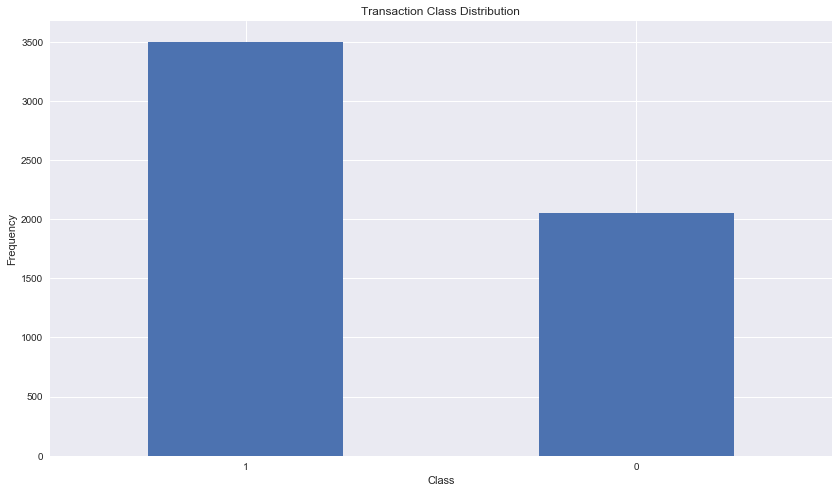

In [53]:
count_classes = pd.value_counts(data_norm5['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");


In [54]:
columns = data_norm5.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm5[columns]
X=X.drop('Class', axis=1)
Y=data_norm5['ClassA']
data_norm55 = X.merge(Y.to_frame(),left_index=True, right_index = True)


In [73]:
state = np.random.RandomState(42)
Fraud = data_norm55[data_norm55['ClassA']==0]
Valid = data_norm55[data_norm55['ClassA']==1]
#outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction = 0.01
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}


In [74]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


Isolation Forest: 3461
Accuracy Score :
0.3763963963963964
Classification Report :
              precision    recall  f1-score   support

           0       0.37      1.00      0.54      2049
           1       0.86      0.01      0.03      3501

    accuracy                           0.38      5550
   macro avg       0.61      0.50      0.28      5550
weighted avg       0.68      0.38      0.22      5550

Local Outlier Factor: 3469
Accuracy Score :
0.37495495495495496
Classification Report :
              precision    recall  f1-score   support

           0       0.37      0.99      0.54      2049
           1       0.79      0.01      0.02      3501

    accuracy                           0.37      5550
   macro avg       0.58      0.50      0.28      5550
weighted avg       0.63      0.37      0.22      5550

Support Vector Machine: 3475
Accuracy Score :
0.3738738738738739
Classification Report :
              precision    recall  f1-score   support

           0       0.36      0.

## class 76 vs 22 

In [75]:
data_norm6 = data_norm5[data_norm5['ClassA']==1]

def func(data_norm6) :
    if data_norm6['Class'] == 76 : return 0
    else : return 1
data_norm6['ClassA'] = data_norm6.apply(func, axis = 1)

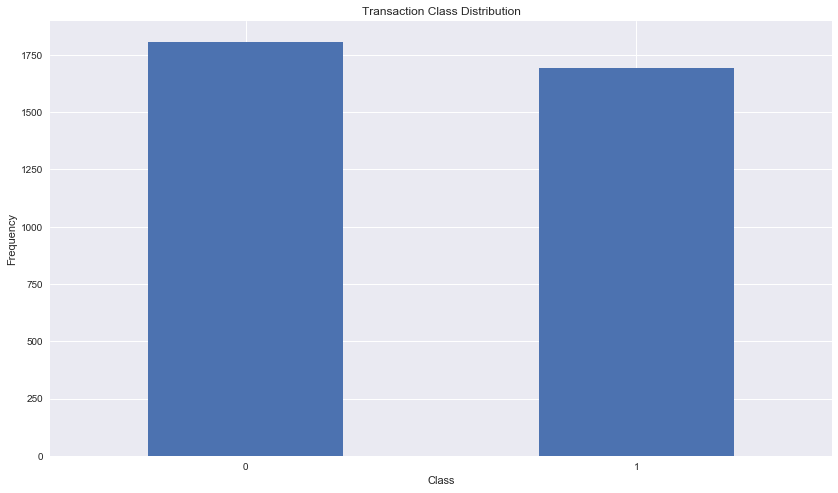

In [76]:
count_classes = pd.value_counts(data_norm6['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");


In [77]:
columns = data_norm6.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm6[columns]
X=X.drop('Class', axis=1)
Y=data_norm6['ClassA']
data_norm66 = X.merge(Y.to_frame(),left_index=True, right_index = True)


In [84]:
state = np.random.RandomState(42)
Fraud = data_norm66[data_norm22['ClassA']==0]
Valid = data_norm66[data_norm22['ClassA']==1]
#outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction= 0.01
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}


In [85]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


Isolation Forest: 1672
Accuracy Score :
0.522422165095687
Classification Report :
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1808
           1       1.00      0.01      0.02      1693

    accuracy                           0.52      3501
   macro avg       0.76      0.51      0.35      3501
weighted avg       0.75      0.52      0.36      3501

Local Outlier Factor: 1688
Accuracy Score :
0.5178520422736361
Classification Report :
              precision    recall  f1-score   support

           0       0.52      0.99      0.68      1808
           1       0.57      0.01      0.02      1693

    accuracy                           0.52      3501
   macro avg       0.54      0.50      0.35      3501
weighted avg       0.54      0.52      0.36      3501

Support Vector Machine: 1609
Accuracy Score :
0.5404170237075121
Classification Report :
              precision    recall  f1-score   support

           0       0.53      0.97